# Machine Learning Essentials SS25 - Exercise Sheet 1

## Instructions
- `TODO`'s indicate where you need to complete the implementations.
- You may use external resources, but <b>write your own solutions</b>.
- Provide concise, but comprehensible comments to explain what your code does.
- Code that's unnecessarily extensive and/or not well commented will not be scored.

## Exercise 2: The Perceptron Algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
# ===============================
# 1. Load & Visualize the Dataset
# ===============================

# TODO: Load dataset, print feature names


# TODO: Select features & corresponding labels
X = 
y = 

# Convert labels from {0,1} to {-1,1} to match Perceptron convention from sheet
y = 2 * (y - 0.5)

# TODO: Standardize the data to zero mean and unit variance, explain why it's useful

# TODO: Visualize dataset using plt.scatter()

In [ ]:
# ========================
# 2. Implement the Perceptron's training algorithm
# ========================

class Perceptron:
    def __init__(self, learning_rate=0.1, num_epochs=10):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.w = None  # Weights
        self.b = None # Bias
        self.history = [] # Store parameters for decision boundary @ each update for visualization
    
    def train(self, X, y):
        """Train the perceptron using the online Perceptron algorithm."""
        n_samples, n_features = X.shape
        # TODO: Initialize weights and bias
        self.w = 
        self.b =

        # Train for num_epochs iterations
        for _ in range(self.num_epochs):
            for i in range(n_samples):
                X_i = X[i]
                # TODO: Implement the update rule
                if y[i] != self.predict(X_i):
                    self.w = 
                    self.b =
                    self.history.append((self.w,self.b)) # Save state for visualization 

    def predict(self, X):
        """Predict the label of a sample."""
        # TODO: Implement the prediction function
        return 

In [ ]:
# ========================
# 3. Train the Perceptron & Evaluate Performance
# ========================

#TODO: Split the data into training and test set
X_train, X_test, y_train, y_test = 

#TODO: Initialize the Perceptron and train it on the training set
perceptron = 
...

#TODO: Use the trained Perceptron to compute the accuracy on the training set and on the test set
...
train_acc =
test_acc =

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

In [ ]:
# ========================
# 4. Plot decision boundary evolution
# ========================

# Visualize the first 5 consecutive decision boundaries for data
decision_boundaries = perceptron.history[:5] # Get the parameters of the first 5 decision boundaries used during training

# TODO: Plot decision boundaries for iterations 1-5

### 5.
TODO: How many updates do you need until convergence (i.e. until no more model updates
occur)? Explain why.


In [2]:
# ========================
# 6. Evaluate Performance Over Multiple Runs
# ========================

#TODO: Evaluate performance over multiple runs. Compute and store test accuracies


#TODO: Plot histogram for the test accuracies



### (a)
TODO: What does the shape of the histogram tell you?

In [4]:
# (b)
#TODO: Compute the sample mean and standard deviation of the test accuracy

### (c)
TODO: Given enough data points and for many training runs, what type of probability distribution would the histogram approximate and what is the reason for that?

In [5]:
# (d)
p_values = [0, 10, 20, 30, 40, 50] # % of flipped training labels
#TODO: Add noise by flipping p% of labels. Visualize the effect using histograms for each p.

TODO: Interpret the results

## Exercise 3: SVM

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from cvxopt import matrix, solvers # Install cvxopt via "pip install cvxopt"

In [10]:
# ========================
# 1. Complete SVM implementation
# ======================== 

class DualSVM:
    def __init__(self, C=1.0, kernel="linear", gamma=1.0):
        self.C = C # Regularization constant
        self.kernel = kernel # Kernel type: "linear" or "rbf"
        self.gamma = gamma # Kernel parameter ("bandwith")
        self.alpha = None # Lagrange multipliers
        self.sv_X = None # Support vectors
        self.sv_y = None # Support vector labels
        self.w = None # Weights
        self.b = None # Bias

    def linear_kernel(self, X1, X2):
        #TODO: Implement linear kernel
        return np.dot(X1, X2.T)
         

    def rbf_kernel(self, X1, X2):
        #TODO: Implement RBF kernel 
        return np.exp(-self.gamma * np.linalg.norm(X1[:, np.newaxis] - X2, axis=2)**2)

    def compute_kernel(self, X1, X2):
        if self.kernel == "linear":
            return self.linear_kernel(X1, X2)
        elif self.kernel == "rbf":
            return self.rbf_kernel(X1, X2)
        else:
            raise ValueError("Unknown kernel type.")

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Compute kernel matrix K: K[i,j] = K(x_i, x_j)
        K = self.compute_kernel(X, X)

        """
        The dual objective is:
            max  sum_i alpha_i - 1/2 sum_i sum_j alpha_i alpha_j y_i y_j K(x_i, x_j)
        subject to:
            sum_i alpha_i y_i = 0  and  0 <= alpha_i <= C for all i.
        In QP formulation:
            P = (y_i y_j K(x_i,x_j))_{i,j},   q = -1 (vector),
            A = y^T, b = 0, and G, h implement 0 <= alpha_i <= C.
        """

        # TODO: Use the matrix function of cvxopt to define the QP parameters
        P = matrix(np.outer(y, y) * K)
        q = matrix(-np.ones(n_samples))
        A = matrix(y, (1, n_samples),"d") # Use "d" flag to make sure that the matrix is in double precision format (labels are integers)
        b = matrix(0.0)
        
        
        # TODO: Implement inequality constraints by defining G and h
        G = matrix(np.vstack((np.eye(n_samples) * -1, np.eye(n_samples))))
        h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * self.C)))

        # Solve the QP problem using cvxopt
        solvers.options["show_progress"] = False
        solution = solvers.qp(P, q, G, h, A, b)
        alphas = np.ravel(solution["x"]) # Get optimal alphas

        # Get support vectors (i.e. data points with non-zero lagrange multipliers, that are on the margin)
        sv = alphas > 1e-5 # alpha > 1e-5 to account for numerical errors
        self.alpha = alphas[sv]
        self.sv_X = X[sv]
        self.sv_y = y[sv]

        # The bias corresponds to the average error over all support vectors:
        # Why does the bias corresponds to the average error over all support vectors?
        # The answer is that the bias is the average of the differences between the true labels and the predicted labels
        # for the support vectors. The predicted labels are computed by the decision function f(x) = sum(alpha_i y_i K(x,x_i)) + b.
        # The difference between the true labels and the predicted labels is the error for each support vector.
        # The bias is the average of these errors.
        self.b = np.mean(self.sv_y - np.sum(self.alpha * self.sv_y * K[sv][:, sv], axis=1))

    def predict(self, X):
        #TODO: Implement the decision function and return the corresponding predicted labels
        K = self.compute_kernel(X, self.sv_X)
        decision_function = np.sum(self.alpha * self.sv_y * K, axis=1) + self.b
        return np.sign(decision_function)
        

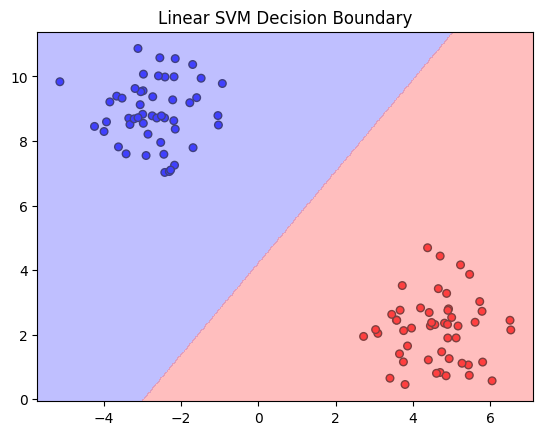

In [12]:
# ========================
# 2. Apply linear SVM on blobs
# ========================

# TODO: Generate blobs dataset
X_linear, y_linear = make_blobs(n_samples=100, centers=2, random_state=42)

# Convert labels from {0,1} to {-1,1}
y_linear = 2 * (y_linear - 0.5) 

#TODO: Train SVM with linear kernel
svm_linear = DualSVM(C=1.0, kernel="linear")
svm_linear.fit(X_linear, y_linear)

#TODO: Plot decision boundary
def plot_decision_boundary(X, y, model, title="SVM Decision Boundary"):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=30)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, 300), np.linspace(*ylim, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.5, levels=np.linspace(-1, 1, 3), cmap='bwr')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)
    plt.show()

plot_decision_boundary(X_linear, y_linear, svm_linear, title="Linear SVM Decision Boundary")    
   

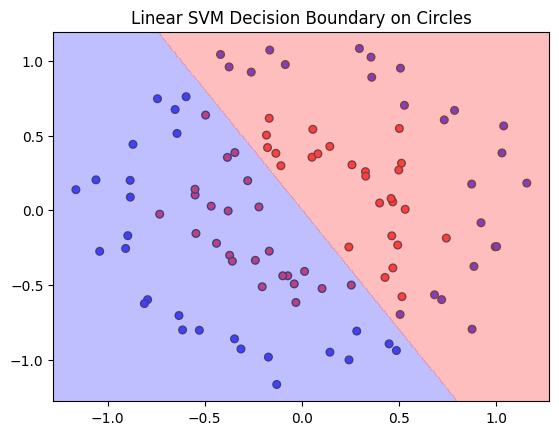

In [13]:
# ===========================
# 3. Apply linear SVM on circles
# ===========================

#TODO: Generate circles dataset
X_circles, y_circles = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)
y_circles = 2 * (y_circles - 0.5)  # Convert labels from {0,1} to {-1,1}

#TODO: Train SVM with linear kernel
svm_circles_linear = DualSVM(C=1.0, kernel="linear")
svm_circles_linear.fit(X_circles, y_circles)

#TODO: Plot decision boundary
plot_decision_boundary(X_circles, y_circles, svm_circles_linear, title="Linear SVM Decision Boundary on Circles")

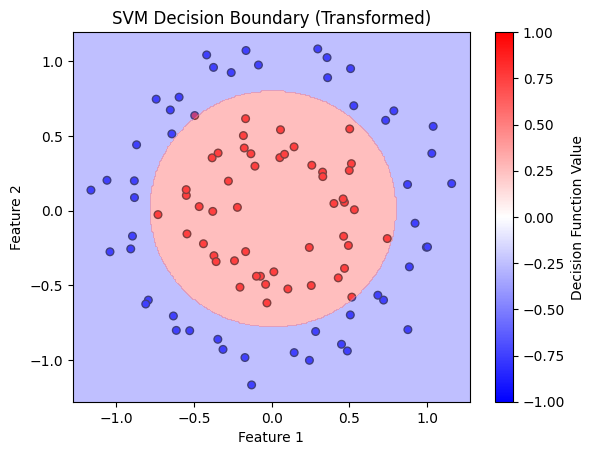

In [16]:
# ===========================
# 4. Apply feature transformation 
# ===========================

def transform_features(X):
    # TODO: compute feature transformation: f(x) = [x1, x2, x1^2 + x2^2]
    X1 = X[:, 0]
    X2 = X[:, 1]
    return np.c_[X1, X2, X1**2 + X2**2]

X_circles_transformed = transform_features(X_circles)

#TODO: Train SVM with linear kernel on transformed features
svm_transformed = DualSVM(C=1.0, kernel="linear")
svm_transformed.fit(X_circles_transformed, y_circles)
def plot_decision_boundary_transformed(X, y, model, title="SVM Decision Boundary (Transformed)"):
    # TODO: Implement plotting function for decision boundary in the transformed feature space
    # Hint: You could do this by creating a 2D meshgrid which you transform using the feature mapping.
    # Then, after evaluating the model on it, you can plot the result as a contour plot (plt.contourf).
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=30)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, 300), np.linspace(*ylim, 300))
    zz = xx**2 + yy**2
    grid_transformed = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
    Z = model.predict(grid_transformed).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.5, levels=np.linspace(-1, 1, 3), cmap='bwr')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label="Decision Function Value")

    plt.show()

#TODO: Plot decision boundary in the transformed feature space
plot_decision_boundary_transformed(X_circles, y_circles, svm_transformed, title="SVM Decision Boundary (Transformed)")

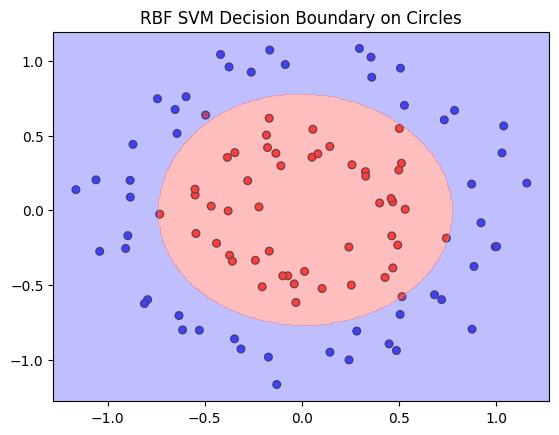

In [17]:
# ===========================
# 5. SVM with RBF Kernel on Circular Data
# ===========================

#TODO: Train SVM with RBF kernel on circular data
svm_rbf = DualSVM(C=1.0, kernel="rbf", gamma=1.0)
svm_rbf.fit(X_circles, y_circles)


#TODO: Plot decision boundary
plot_decision_boundary(X_circles, y_circles, svm_rbf, title="RBF SVM Decision Boundary on Circles")

### 6.

TODO: Compare the decision boundaries from Tasks 3, 4, and 5. How does feature transformation differ from using an RBF kernel? When would one approach be preferable to the other?


## Answer:

#### Task 3: Linear SVM on Circular Data
- The decision boundary is linear in the input space.
- Fails to classify correctly due to non-linear separability.
- Performs poorly.

#### Task 4: Linear SVM after Feature Transformation
- Input is explicitly transformed to a 3D space:
  
  $f(x) = [x_1, x_2, x_1^2 + x_2^2]$
  
- In this higher-dimensional space, the data becomes linearly separable.
- The decision boundary in the original space becomes a non-linear (circular) curve.

#### Task 5: RBF Kernel SVM
- The kernel implicitly maps data into an infinite-dimensional space.
- Achieves non-linear decision boundaries without explicit feature transformation.
- Correctly classifies circular data.


#### Feature Transformation vs. RBF Kernel
- Feature transformation explicitly maps the data to new features while RBF kernel implicitly maps via the kernel trick.
- As compared to RBF kernel which is flexible and powerful for complex high dimensional mappings, feature transformation requires domain knowledge and is efficient for low-dim transformations.
- Feature transformation was much easier to interpret and visualize than RBF.

#### When to use each:
- **Feature Transformation**:
    - When you know a useful transformation.
    - For interpretability or reduced complexity.

- **RBF Kernel**:
    - For unknown or complex non-linear patterns.
    - When performance is the primary goal.

    

### 7. 

TODO: Besides the dual formulation, SVMs also have an equivalent primal formulation. The key factor in choosing which one to use as the optimization criterion is the dimensionality of the features. Explain why.

## Answer:

SVMs can be formulated in two ways:

- **Primal Form**: Optimizes directly over the weights  $w$ and bias $b$.
- **Dual Form**: Optimizes over Lagrange multipliers $ \alpha_i$, relying on dot products.

#### Which to use (Depends on Dimensionality):
- Use dual form when number of samples $n$ is small and primal form when feature dimension $d$ is small.
- When we want to use kernel function then we can use dual form, and when data is very high-dimensional then primal form.

#### Key factors:
- Dual SVM scales with **number of samples** $O(n^2) $
- Primal SVM scales with **number of features** $ O(d)$
- So, if $ d \gg n $ (e.g., text classification), use the **primal form**.